# Image Processing: Histogram of Oriented Gradients (HOG)

This code example uses the `skimage` library to perform image operations and HOG.

In [21]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import data, exposure
import matplotlib.pyplot as plt

In [9]:
def show_image(img):
    # show image and return shape
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    return img.shape

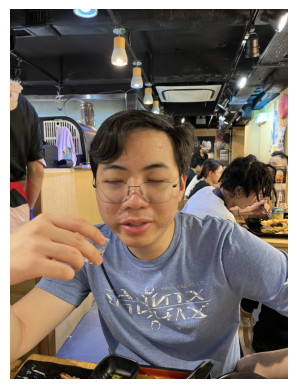

(4032, 3024, 3)

In [10]:
# load in image
img = imread("image.png")
show_image(img)

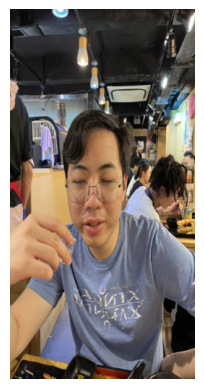

(512, 256, 3)

In [11]:
# resize image
img = resize(img, (128 * 4, 64 * 4))
show_image(img)

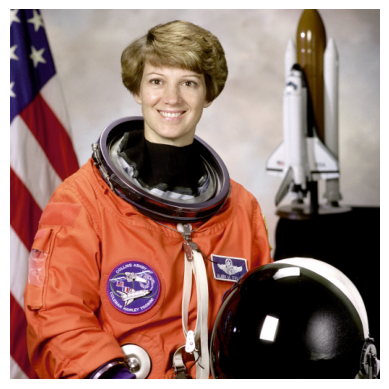

(512, 512, 3)

In [22]:
img = data.astronaut()
show_image(img)

## Orientations

C:\Users\fongc\AppData\Local\Temp\ipykernel_4808\4164953950.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


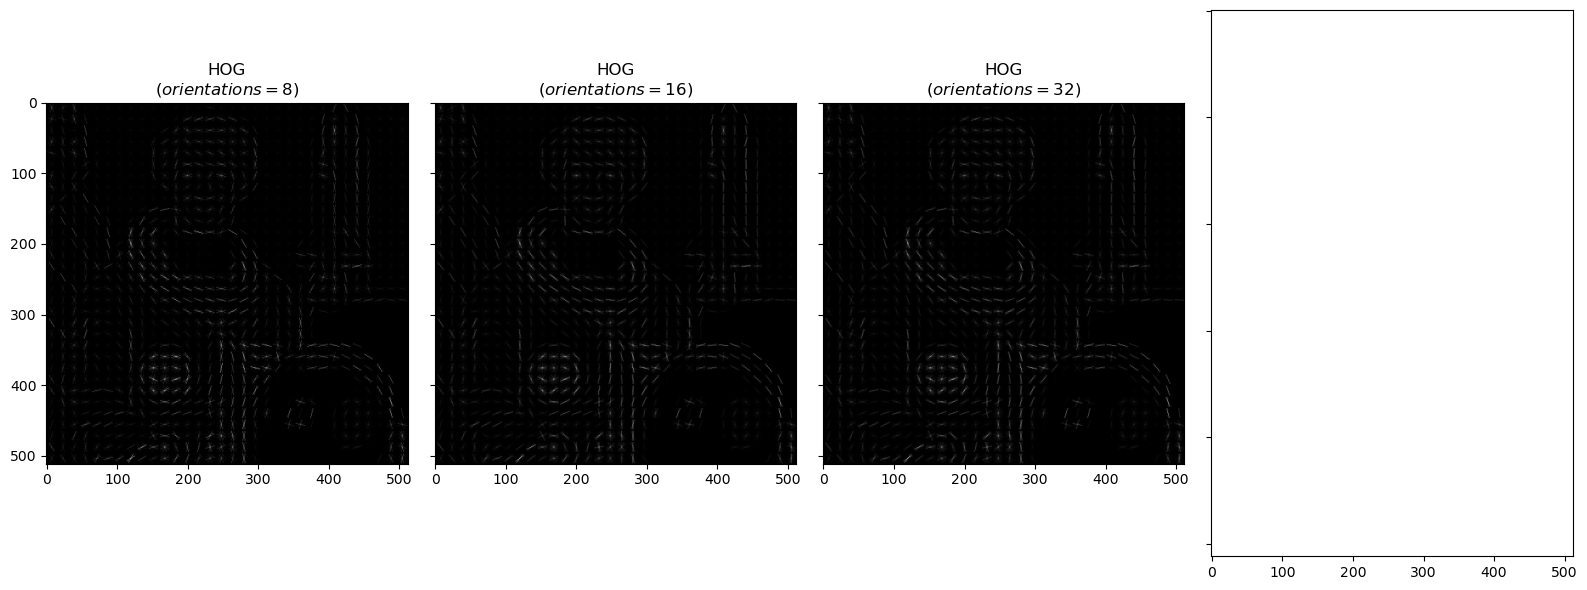

In [42]:
ORIENTATIONS = [8, 16, 32]

# plot orientations in the same subplot
fig, axes = plt.subplots(1, len(ORIENTATIONS) + 1, figsize=(4 * (len(ORIENTATIONS) + 1), 6), sharex = True, sharey = True)
for i, (ax, o) in enumerate(zip(axes, ORIENTATIONS)):
    if i == 0:
        # plot original image
        ax.imshow(img)
        ax.set_title("Original")
    else:
        fd, hog_image = hog(
            img,
            orientations = o,
            pixels_per_cell = (16, 16),
            cells_per_block = (1, 1),
            visualize = True,
            channel_axis = -1
        )
        ax.imshow(hog_image, cmap=plt.cm.gray)
        ax.set_title("HOG\n($orientations = {}$)".format(o))
    ax.axis("off")

fig.tight_layout()
fig.show()

## Pixels per cell